In [1]:
import numpy as np

#import faseportret as fp

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
# import seaborn as sns
import matplotlib.colors as colors
import os

# import scipy.io as io
# import scipy.interpolate as inter
# import scipy.optimize as opt
import sympy as sp

import math
import pandas as pd

#plt.style.use(['gruvboxd_style_theme', 'gruvboxd_color_theme'])

import matplotlib.animation as animation


from IPython.display import display
sp.init_printing()
%matplotlib notebook

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\style\core.py:201: UserWarning: In C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\beaver_color_theme.mplstyle: Bad val "'" on line #1
	"axes.prop_cycle : '#d8d8d8', '#969696', '#cc0000', '#33b2b2'"
	in file "C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\beaver_color_theme.mplstyle"
	Key axes.prop_cycle: ''' is not a valid cycler construction: EOL while scanning string literal (<string>, line 1)
  warnings.warn(message)


In [5]:
# functie om foutenpropagatieformules uit te rekenen
def fout(expression, variables, stdvs):
    f2 = 0 # initialiseer de formule
    # voeg de term voor elke variabele toe
    for i in range(len(variables)):
        f2 += sp.diff(expression, variables[i])**2 * stdvs[i]**2
    # neem de wortel en return dit als resultaat
    return sp.sqrt(f2)

# Voorbereidende oefeningen

**Oefening 1**

In [43]:
# initialiseren symbolen en in lijsten zetten om eenvoudig te refereren
Rc, Rd, Re, Rn, Vt, Vn, In = sp.symbols('R_C, R_D, R_E, R_n, V_T, V_n, I_n')
dRc, dRd, dRe, dVt = sp.symbols('dR_c, dR_D, dR_E, dV_T')
var = [Rc, Rd, Re, Vt]
stdv = [dRc, dRd, dRe, dVt]

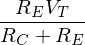

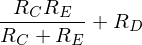

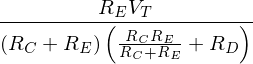

In [44]:
# formules voor V_n, R_N en I_N
VN = Vt*Re/(Re+Rc)
RN = Rd + Rc*Re/(Re+Rc)
IN = VN / RN
display(VN, RN, IN)
#print(sp.latex(VN))

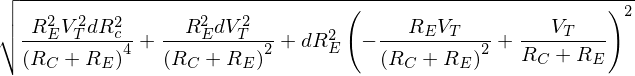

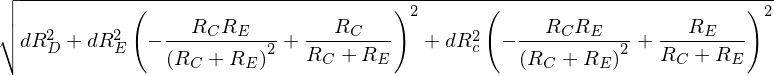

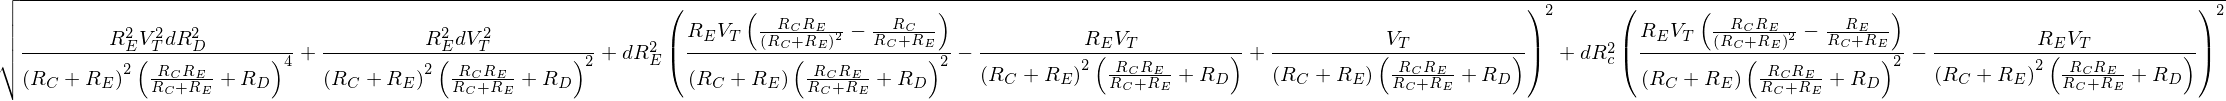

In [6]:
# bereken de fouten op deze uitdrukkingen
def fout(expression, variables, stdvs):
    f2 = 0
    for i in range(len(variables)):
        f2 += sp.diff(expression, variables[i])**2 * stdvs[i]**2
    return sp.sqrt(f2)

dVN = fout(VN, var, stdv)
dRN = fout(RN, var, stdv)
dIN = fout(IN, var, stdv)
display(dVN, dRN, dIN)
#print(sp.latex(dIN))

In [7]:
# uitrekenen norton equivalenten
# de waardes van de weerstanden
waarde = [10e3, 5e3, 5e3, 30]
# substitueer de waardes voor de symbolen
sub = {var[i] : waarde[i] for i in range(4)}
sub2 = {var[i] : waarde[i] for i in range(4)}
sub2.update({stdv[i] : 0.01*waarde[i] for i in range(4)})
# reken de equivalenten en hun fout uit
display("V_n: %.2e Volt, R_n: %.2e Ohm, I_n: %.2e Ampère" %(VN.subs(sub), RN.subs(sub), IN.subs(sub)))
fouten = [dVN.subs(sub2), dRN.subs(sub2), dIN.subs(sub2)]
display(fouten)

'V_n: 1.00e+01 Volt, R_n: 8.33e+03 Ohm, I_n: 1.20e-03 Ampère'

In [8]:
# opgave rond impedance matching
Rl, Pl, Rth = sp.symbols('R_L, P_L, R_TH')
sp.solve(sp.diff(Rl/(Rl+Rth)**2, Rl), Rl)

# practicum

**Vraag 4 - theoretische waardes**

In [7]:
display(var)

'V_n: 1.81e+00 Volt, R_n: 3.32e+03 Ohm, I_n: 5.44e-04 Ampère'

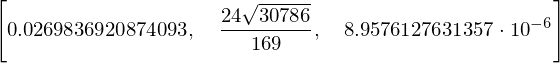

In [8]:
waarde = [2400, 2400, 1500, 4.7]
fouten = [24, 24, 15, 0.01+0.01*4.7]
sub = {var[i] : waarde[i] for i in range(4)}
sub.update({stdv[i] : fouten[i] for i in range(4)})
display("V_n: %.2e Volt, R_n: %.2e Ohm, I_n: %.2e Ampère" %(VN.subs(sub), RN.subs(sub), IN.subs(sub)))
fouten = [dVN.subs(sub), dRN.subs(sub), dIN.subs(sub)]
display(fouten)

# dataverwerking

## Importeren data

In [25]:
data_1v1 = pd.read_csv('1.V1.txt', delimiter = '\t')
data_1v1 = data_1v1.sort_values('I [mA]')
data_1v2 = pd.read_csv('1.V2.txt', delimiter = '\t')
data_1v2 = data_1v2.drop(6)
data_1v2 = data_1v2.sort_values('I [mA]')
data_2 = pd.read_csv('2.txt', delimiter = '\t')
data_4 = pd.read_csv('4.txt', delimiter = '\t', header=None)
data_311 = [0.2, 0, 0, -0.2]
data_312 = [-10.2, 0.2, 0.2, 9.77]
data_321 = [-4.5, 4.5]
data_322 = [-0.33, -4.17, 4.5]
data_323 = [-4.5, 0.06, -9.72, 10.19, -0.2, 4.17]

## Opdracht 1

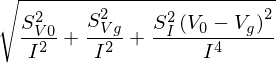

\sqrt{\frac{S_{V0}^{2}}{I^{2}} + \frac{S_{Vg}^{2}}{I^{2}} + \frac{S_{I}^{2} \left(V_{0} - V_{g}\right)^{2}}{I^{4}}}


In [9]:
# de formule om de inwendige weerstand te berekenen
V0, Vg, I = sp.symbols('V_0, V_g, I')
Rv = (V0-Vg)/I
variables = [V0, Vg, I]
dV0, dVg, dI = sp.symbols('S_V0, S_Vg, S_I')
deviations = [dV0, dVg, dI]
# formule voor bereken de fout op de berekende weerstand
dRv = fout(Rv, variables, deviations)
display(dRv)
print(sp.latex(dRv))

### Spanningsbron 1

In [10]:
# initialiseren arrays om resultaten en fouten uit te rekenen
v0 = np.ones_like(data_1v1['I [mA]'])*4.72
dv0 = np.ones_like(data_1v1['I [mA]'])*0.06
symbols = variables + deviations
# deel waardes stroom door 1000 - staan nog in mA; deel de fouten door sqrt(12) om uniforme fout om te zetten in standaardafwijkingen
correc = np.sqrt(12)
values = [v0, data_1v1['Vg'].values, data_1v1['I [mA]'].values/(1000),dv0/correc, data_1v1['fout.1'].values/correc, data_1v1['fout'].values/(1000*correc)]

# berekenen waardes en fouten
interne_weerstand = sp.lambdify(variables, Rv, 'numpy')(*values[0:3])
fout_interne_weerstand = sp.lambdify(symbols, dRv, 'numpy')(*values)

**Genereer latex tabellen met de data**

In [11]:
# data van de metingen
d = {'I [mA]' : data_1v1['I [mA]'], 'fout I' : data_1v1['fout'], 'V_g' : data_1v1['Vg'], 'fout Vg' : data_1v1['fout.1']}
df = pd.DataFrame(d)
df = df.round(2)
print(df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  I [mA] &  fout I &   V\_g &  fout Vg \\
\midrule
4 &    0.65 &    0.02 &  4.71 &     0.06 \\
3 &    0.71 &    0.02 &  4.71 &     0.06 \\
2 &    0.81 &    0.02 &  4.71 &     0.06 \\
1 &    1.17 &    0.02 &  4.70 &     0.06 \\
0 &    1.65 &    0.03 &  4.69 &     0.06 \\
6 &    2.62 &    0.04 &  4.67 &     0.06 \\
5 &    3.89 &    0.05 &  4.64 &     0.06 \\
7 &    5.66 &    0.07 &  4.61 &     0.06 \\
8 &    8.07 &    0.09 &  4.56 &     0.06 \\
\bottomrule
\end{tabular}



In [12]:
# de berekende waarden en de strooom erbij
d = {'I [mA]' : data_1v1['I [mA]'], 'Interne weerstand' : interne_weerstand, 'fout' : fout_interne_weerstand}
df = pd.DataFrame(d)
df = df.round({'I [mA]' : 2, 'Interne weerstand' : 0, 'fout' : 0})
print(df.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  I [mA] &  Interne weerstand &  fout \\
\midrule
4 &    0.65 &               15.0 &  38.0 \\
3 &    0.71 &               14.0 &  35.0 \\
2 &    0.81 &               12.0 &  30.0 \\
1 &    1.17 &               17.0 &  21.0 \\
0 &    1.65 &               18.0 &  15.0 \\
6 &    2.62 &               19.0 &   9.0 \\
5 &    3.89 &               21.0 &   6.0 \\
7 &    5.66 &               19.0 &   4.0 \\
8 &    8.07 &               20.0 &   3.0 \\
\bottomrule
\end{tabular}



**bereken het gemiddelde en de standdaardeviatie, gewoon en met een gewogen gemiddelde**

In [13]:
gemiddelde = interne_weerstand.mean()
stdv = interne_weerstand.std()
print('gemiddelde interne weerstand: %.0f \n standaarddeviatie: %0.f' %(gemiddelde, stdv))
G = 1/fout_interne_weerstand**2
R = interne_weerstand
R_i = np.dot(R, G)/np.sum(G)
display(R_i)
eps = 1/np.sqrt(np.sum(G))
display(eps)

gemiddelde interne weerstand: 17 
 standaarddeviatie: 3


### Spanningsbron 2

In [14]:
# initialiseren arrays om resultaten en fouten uit te rekenen
v0 = np.ones_like(data_1v2['I [mA]'])*11.18
dv0 = np.ones_like(data_1v2['I [mA]'])*0.12
symbols = variables + deviations
# deel waardes stroom door 1000 - staan nog in mA
values = [v0, data_1v2['Vg'].values, data_1v2['I [mA]'].values/1000,dv0/correc, data_1v2['fout.1'].values/correc, data_1v2['fout'].values/(1000*correc)]

# berekenen waardes en fouten
interne_weerstand = sp.lambdify(variables, Rv, 'numpy')(*values[0:3])
fout_interne_weerstand = sp.lambdify(symbols, dRv, 'numpy')(*values)

**Genereer latex tabellen met de data**

In [15]:
# data van de metingen
d = {'I [mA]' : data_1v2['I [mA]'], 'fout I' : data_1v2['fout'], 'V_g' : data_1v2['Vg'], 'fout Vg' : data_1v2['fout.1']}
df = pd.DataFrame(d)
df = df.round(2)
print(df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  I [mA] &  fout I &    V\_g &  fout Vg \\
\midrule
0 &    1.55 &    0.03 &  11.09 &     0.12 \\
1 &    1.68 &    0.03 &  11.08 &     0.12 \\
2 &    1.91 &    0.03 &  11.07 &     0.12 \\
3 &    2.39 &    0.03 &  11.04 &     0.12 \\
4 &    3.85 &    0.05 &  10.96 &     0.12 \\
5 &    6.07 &    0.07 &  10.83 &     0.12 \\
8 &    8.95 &    0.10 &  10.67 &     0.12 \\
7 &   12.85 &    0.14 &  10.45 &     0.11 \\
\bottomrule
\end{tabular}



In [16]:
# de berekende waarden en de strooom erbij
d = {'I [mA]' : data_1v2['I [mA]'], 'Interne weerstand' : interne_weerstand, 'fout' : fout_interne_weerstand}
df = pd.DataFrame(d)
df = df.round({'I [mA]' : 2, 'Interne weerstand' : 0, 'fout' : 0})
print(df.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  I [mA] &  Interne weerstand &  fout \\
\midrule
0 &    1.55 &               58.0 &  32.0 \\
1 &    1.68 &               60.0 &  29.0 \\
2 &    1.91 &               58.0 &  26.0 \\
3 &    2.39 &               59.0 &  20.0 \\
4 &    3.85 &               57.0 &  13.0 \\
5 &    6.07 &               58.0 &   8.0 \\
8 &    8.95 &               57.0 &   5.0 \\
7 &   12.85 &               57.0 &   4.0 \\
\bottomrule
\end{tabular}



In [17]:
gemiddelde = interne_weerstand.mean()
stdv = interne_weerstand.std()
print('gemiddelde interne weerstand: %.0f \n standaarddeviatie: %0.f' %(gemiddelde, stdv))
G = 1/fout_interne_weerstand**2
R = interne_weerstand
R_i = np.dot(R, G)/np.sum(G)
display(R_i)
eps = 1/np.sqrt(np.sum(G))
display(eps)

gemiddelde interne weerstand: 58 
 standaarddeviatie: 1


## Opdracht 2

In [18]:
# initialiseer symbolen en formules
It, Ia, R = sp.symbols('I_t, I_a, R')
Ra = It*R/Ia-R
SIt, SIa, SR = sp.symbols('S_It, S_Ia, S_R')
sym = [It, Ia, R]
stdv = [SIt, SIa, SR]
SRa = fout(Ra, sym, stdv)
print(sp.latex(SRa))

\sqrt{S_{R}^{2} \left(-1 + \frac{I_{t}}{I_{a}}\right)^{2} + \frac{R^{2} S_{It}^{2}}{I_{a}^{2}} + \frac{I_{t}^{2} R^{2} S_{Ia}^{2}}{I_{a}^{4}}}


In [19]:
# verwijder overbodige kolommen
data_2 = data_2.drop(['weerstand', 'verhouding'], axis=1)

In [20]:
# bereken de interne weerstand en afwijking, voeg dit toe aan het dataFrame
waardes = [data_2['stroom 1 [mA]'], data_2['stroom2'], np.ones_like(data_2['stroom2'])*10]
fouten = [data_2['stroom 1 [mA]']*0.01+0.01, data_2['stroom2']*0.01+0.01, 0.1]
intern = sp.lambdify(sym, Ra, 'numpy')(*waardes)
afwijking = sp.lambdify(sym+stdv, SRa, 'numpy')(*waardes, *fouten)
data_2.loc[:, 'interne weerstand'] = intern
data_2.loc[:, 'afwijking'] = afwijking
data_2

,stroom 1 [mA],stroom2,interne weerstand,afwijking
0,2.62,1.44,8.194444,0.406149
1,8.07,4.46,8.094170,0.311409
2,1.65,0.90,8.333333,0.493396


In [21]:
# zet het dataFrame om naar een latex tabel
data_2 = data_2.round({'interne weerstand' : 1, 'afwijking' : 1})
print(data_2.to_latex())
display(fouten)

\begin{tabular}{lrrrr}
\toprule
{} &  stroom 1 [mA] &  stroom2 &  interne weerstand &  afwijking \\
\midrule
0 &           2.62 &     1.44 &                8.2 &        0.4 \\
1 &           8.07 &     4.46 &                8.1 &        0.3 \\
2 &           1.65 &     0.90 &                8.3 &        0.5 \\
\bottomrule
\end{tabular}



[0    0.0362
 1    0.0907
 2    0.0265
 Name: stroom 1 [mA], dtype: float64, 0    0.0244
 1    0.0546
 2    0.0190
 Name: stroom2, dtype: float64, 0.1]

In [22]:
# bereken het gemmidelde en de standaarddeviatie op de normale manier en via een gewogen gemiddelde
gemiddelde = intern.mean()
stdv = intern.std()
print('gemiddelde interne weerstand: %.2f \n standaarddeviatie: %.2f' %(gemiddelde, stdv))
G = 1/afwijking**2
R = intern
R_i = np.dot(R, G)/np.sum(G)
display(R_i)
eps = 1/np.sqrt(np.sum(G))
display(eps)

gemiddelde interne weerstand: 8.21 
 standaarddeviatie: 0.12


## Opdracht 3

In [23]:
0.012/np.sqrt(12)

## Opdracht 4

In [30]:
data_4 = data_4.set_index(0)
data_4 = data_4.drop(2, axis=1)
data_4

,1,3
0,,
Rc,2400.00,2400.00
RD,1500.00,2400.00
RE,1500.00,1500.00
V,1.80,1.80
I,0.63,0.46


In [68]:
# initialiseren symbolen en in lijsten zetten om eenvoudig te refereren
Rc, Rd, Re, Rn, Vt, Vn, In = sp.symbols('R_1, R_3, R_2, R_n, V_T, V_n, I_n')
dRc, dRd, dRe, dVt = sp.symbols('S_R1, S_R3, S_R2, S_VT')
var = [Rc, Rd, Re, Vt]
stdv = [dRc, dRd, dRe, dVt]

In [69]:
# formules voor V_n, R_N en I_N
VN = Vt*Re/(Re+Rc)
RN = Rd + Rc*Re/(Re+Rc)
IN = VN / RN
#display(VN, RN, IN)
print(sp.latex(IN))

\frac{R_{2} V_{T}}{\left(R_{1} + R_{2}\right) \left(\frac{R_{1} R_{2}}{R_{1} + R_{2}} + R_{3}\right)}


In [71]:
# bereken de fouten op deze uitdrukkingen

dVN = fout(VN, var, stdv)
dRN = fout(RN, var, stdv)
dIN = fout(IN, var, stdv)
#display(dVN, dRN, dIN)
print(sp.latex(dVN**2))

\frac{R_{2}^{2} S_{R1}^{2} V_{T}^{2}}{\left(R_{1} + R_{2}\right)^{4}} + \frac{R_{2}^{2} S_{VT}^{2}}{\left(R_{1} + R_{2}\right)^{2}} + S_{R2}^{2} \left(- \frac{R_{2} V_{T}}{\left(R_{1} + R_{2}\right)^{2}} + \frac{V_{T}}{R_{1} + R_{2}}\right)^{2}


In [79]:
# bereken de theoretische waarden en de fouten hierop voor het eerste circuit
waarden = data_4[1].values
waarden = waarden[:4]
waarden[3] = 4.7
fouten = 0.01*waarden
fouten[3] += 0.01
#print(waarden, fouten)
norton_stroom = sp.lambdify(var, IN, 'numpy')(*waarden)
norton_spanning = sp.lambdify(var, VN, 'numpy')(*waarden)
weerstand = sp.lambdify(var, RN, 'numpy')(*waarden)
Sn_stroom = sp.lambdify(var+stdv, dIN, 'numpy')(*waarden, *fouten)
Sn_spanning = sp.lambdify(var+stdv, dVN, 'numpy')(*waarden, *fouten)
S_weerstand = sp.lambdify(var+stdv, dRN, 'numpy')(*waarden, *fouten)
print('theoretischen nortonstroom: %.3f +- %.3f mA\n theorethische nortonspanning: %.2f +- %.2f V' %(norton_stroom*1000, Sn_stroom*1000, norton_spanning, Sn_spanning))
print('%.2f +- %.2f' %(weerstand, S_weerstand))

theoretischen nortonstroom: 0.746 +- 0.012 mA
 theorethische nortonspanning: 1.81 +- 0.03 V
2423.08 +- 16.43


In [78]:
# bereken de theoretische waarden en de fouten hierop voor het tweede circuit
waarden = data_4[3].values
waarden = waarden[:4]
waarden[3] = 4.7
fouten = 0.01*waarden
fouten[3] += 0.01
#print(waarden, fouten)
norton_stroom = sp.lambdify(var, IN, 'numpy')(*waarden)
norton_spanning = sp.lambdify(var, VN, 'numpy')(*waarden)
weerstand = sp.lambdify(var, RN, 'numpy')(*waarden)
Sn_stroom = sp.lambdify(var+stdv, dIN, 'numpy')(*waarden, *fouten)
Sn_spanning = sp.lambdify(var+stdv, dVN, 'numpy')(*waarden, *fouten)
S_weerstand = sp.lambdify(var+stdv, dRN, 'numpy')(*waarden, *fouten)
print('theoretischen nortonstroom: %.3f +- %.3f mA\n theorethisce nortonspanning: %.2f +- %.2f V' %(norton_stroom*1000, Sn_stroom*1000, norton_spanning, Sn_spanning))
print('%.2f +- %.2f' %(weerstand, S_weerstand))

theoretischen nortonstroom: 0.544 +- 0.009 mA
 theorethisce nortonspanning: 1.81 +- 0.03 V
3323.08 +- 24.92


In [73]:
print(data_4.transpose().to_latex())

\begin{tabular}{lrrrrr}
\toprule
0 &      Rc &      RD &      RE &    V &     I \\
\midrule
1 &  2400.0 &  1500.0 &  1500.0 &  4.7 &  0.63 \\
3 &  2400.0 &  2400.0 &  1500.0 &  4.7 &  0.46 \\
\bottomrule
\end{tabular}



In [76]:
a1 = [0.746, 0.544]
a2 = [0.012, 0.009]
a3 = [1.81, 1.81]
a4 = [0.03, 0.03]
df = pd.DataFrame([a1, a2, a3, a4])
print(df.transpose().to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &      0 &      1 &     2 &     3 \\
\midrule
0 &  0.746 &  0.012 &  1.81 &  0.03 \\
1 &  0.544 &  0.009 &  1.81 &  0.03 \\
\bottomrule
\end{tabular}

